On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [17]:
#import the needed libraries

import numpy as np
import pandas as pd

In [18]:
#read the data into a dataframe and show the first 10 rows

df = pd.read_csv('Winter_2022_Data_Science_Intern_Challenge_DataSet.csv')
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [19]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

None of the columns have null values

We are concerned with only two columns for now - order amount and total items

In [20]:
df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


# **A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.** 

Discussion:
- The Average Order Value of $3145.13 was gotten from the value of the mean
- The mean is not the right metrics because the very high standard deviation shows the presence of outliers
- Mean is the only measure of central tendency that is always affected by an outlier, so the presence of them makes the mean the wrong metric for the AOV.
- Therefore, we have to deal with the outliers to get a good average order values

In [27]:
# Filter necessary columns for analysis
data = df[['shop_id', 'user_id', 'order_amount', 'total_items']]
data.head()

,shop_id,user_id,order_amount,total_items
0,53,746,224,2
1,92,925,90,1
2,44,861,144,1
3,18,935,156,1
4,18,883,156,1


## Dealing with outliers

We will look for the outliers in the order_amount and total_items columns because these are the two important
columns in our dataa

<AxesSubplot:>

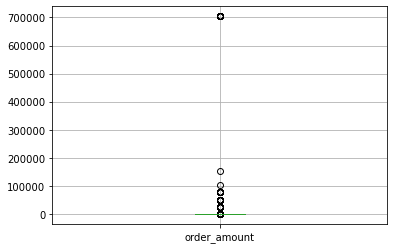

In [28]:
data.boxplot(column='order_amount')

There are outliers in the data. Let's look for the shop id

In [29]:
pivot_table = data.pivot_table(values='order_amount', index='shop_id', aggfunc='mean')
result = pivot_table.sort_values('order_amount', ascending = False)
result.head()

,order_amount
shop_id,
42,235101.490196
78,49213.043478
50,403.545455
90,403.224490
38,390.857143


Shops 42 and 78 charge rediculous amount for sneakers. These are the outliers in our data

Now, let's check the total_items column

In [32]:
data['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

A particular store is selling 2000 items per order. This is outragious. Let's check the store